In [1267]:
import textdistance
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math
import copy
from itertools import combinations
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, normalized_mutual_info_score
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.cluster import KMeans

import nltk
from nltk.stem.porter import *

porterStemmer = PorterStemmer()

In [1268]:
#load in the data
amazon=pd.read_csv('amazon_small.csv',encoding = 'ISO-8859-1')
google=pd.read_csv('google_small.csv',encoding = 'ISO-8859-1')

In [788]:
# obtain the cross product of the two dataframe
amazon['key'] = 1
google['key'] = 1
df = pd.merge(amazon, google, on='key')
del df['key']
df

,idAmazon,title,description_x,manufacturer_x,price_x,idGoogleBase,name,description_y,manufacturer_y,price_y
0,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,macsoft,49.99,http://www.google.com/base/feeds/snippets/1329...,encore software 10599 - encore registry mechan...,encore software 10599 : pc tools registry mech...,NaN,25.97
1,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,macsoft,49.99,http://www.google.com/base/feeds/snippets/1693...,adobe indesign cs3 for mac upgrade from pagemaker,system requirements powerpc g4 or g5 or intel ...,NaN,205.99
2,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,macsoft,49.99,http://www.google.com/base/feeds/snippets/4998...,encore software 10568 - encore hoyle puzzle & ...,encore software 10568 : with old classics and ...,NaN,17.97
3,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,macsoft,49.99,http://www.google.com/base/feeds/snippets/1695...,school zone interactive multiplication & divis...,multiplication & division introduces mutliplic...,NaN,9.45
4,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,macsoft,49.99,http://www.google.com/base/feeds/snippets/1574...,apple software m9953z/a remote desktop 2.2 10 ...,the 10-client version allows one administrator...,apple software,294.99
...,...,...,...,...,...,...,...,...,...,...
22195,b000qfrt4o,professional home design suite platinum,do you believe your home is your castle? make ...,punch! software,99.95,http://www.google.com/base/feeds/snippets/3924...,the printshop pro publisher v22 deluxe dvd-rom,overview create professional projects with all...,NaN,69.90
22196,b000qfrt4o,professional home design suite platinum,do you believe your home is your castle? make ...,punch! software,99.95,http://www.google.com/base/feeds/snippets/1352...,webroot software 65210 spy sweeper 3 pc,spy sweeper 4.5 with the most advanced blockin...,webroot software,31.99
22197,b000qfrt4o,professional home design suite platinum,do you believe your home is your castle? make ...,punch! software,99.95,http://www.google.com/base/feeds/snippets/1837...,microsoft b21-00806 ae mappoint 2006 cd,ae mappoint 2006 cd,NaN,50.39
22198,b000qfrt4o,professional home design suite platinum,do you believe your home is your castle? make ...,punch! software,99.95,http://www.google.com/base/feeds/snippets/1677...,emedia music corp my guitar,NaN,NaN,24.81


In [789]:
# replace nan cells as empty string
df["description_x"].replace(np.nan,"",inplace = True)
df["description_y"].replace(np.nan,"", inplace = True)

In [790]:
def tonkenised_string(string):
    '''
    function that passes a string to tokenise and clean as the prepossessing for data matching
    '''
    # tokenise the strings and remove all punctuations
    tokens = nltk.word_tokenize(string)
    words = [word.lower() for word in tokens if (word.isalpha() or word.isnumeric())]

    # remove all stopwords
    from nltk.corpus import stopwords
    stopWords = set(stopwords.words('english'))
    filteredList = [w for w in words if not w in stopWords]

    # stemming
    wordList = []
    for word in filteredList:
        wordList.append(porterStemmer.stem(word))
    
    return wordList

In [791]:
#obtain the distance for each pair of product
name_list = []
dscp_list = []
price_list = []
total_list = []
for i in range(len(df)):
    name_x = ' '.join(word for word in tonkenised_string(df['title'][i]))
    name_y = ' '.join(word for word in tonkenised_string(df['name'][i]))
    name_distance = 0.7*textdistance.jaro_winkler(name_x , name_y) + 0.3*textdistance.overlap(tonkenised_string(df['title'][i]), tonkenised_string(df['name'][i]))
    name_list.append(name_distance)

    dscp_distance = textdistance.overlap(tonkenised_string(df['description_x'][i]), tonkenised_string(df['description_y'][i]))
    dscp_list.append(dscp_distance) 
    
    price_distance = abs((df['price_x'][i]-df['price_y'][i])/max(df['price_x'][i],df['price_y'][i]))
    price_list.append(price_distance) 


,idAmazon,title,description_x,manufacturer_x,price_x,idGoogleBase,name,description_y,manufacturer_y,price_y,name_distance,dscp_distance,price_distance,total_distance
0,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,macsoft,49.99,http://www.google.com/base/feeds/snippets/1329...,encore software 10599 - encore registry mechan...,encore software 10599 : pc tools registry mech...,NaN,25.97,0.409777,0.000000,0.480496,0.110871
1,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,macsoft,49.99,http://www.google.com/base/feeds/snippets/1693...,adobe indesign cs3 for mac upgrade from pagemaker,system requirements powerpc g4 or g5 or intel ...,NaN,205.99,0.509583,0.000000,0.757318,0.018032
2,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,macsoft,49.99,http://www.google.com/base/feeds/snippets/4998...,encore software 10568 - encore hoyle puzzle & ...,encore software 10568 : with old classics and ...,NaN,17.97,0.376472,0.166667,0.640528,-0.020787
3,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,macsoft,49.99,http://www.google.com/base/feeds/snippets/1695...,school zone interactive multiplication & divis...,multiplication & division introduces mutliplic...,NaN,9.45,0.436835,0.055556,0.810962,-0.096973
4,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,macsoft,49.99,http://www.google.com/base/feeds/snippets/1574...,apple software m9953z/a remote desktop 2.2 10 ...,the 10-client version allows one administrator...,apple software,294.99,0.412222,0.111111,0.830537,-0.131069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22195,b000qfrt4o,professional home design suite platinum,do you believe your home is your castle? make ...,punch! software,99.95,http://www.google.com/base/feeds/snippets/3924...,the printshop pro publisher v22 deluxe dvd-rom,overview create professional projects with all...,NaN,69.90,0.446995,0.318182,0.300650,0.339465
22196,b000qfrt4o,professional home design suite platinum,do you believe your home is your castle? make ...,punch! software,99.95,http://www.google.com/base/feeds/snippets/1352...,webroot software 65210 spy sweeper 3 pc,spy sweeper 4.5 with the most advanced blockin...,webroot software,31.99,0.374903,0.100000,0.679940,-0.062817
22197,b000qfrt4o,professional home design suite platinum,do you believe your home is your castle? make ...,punch! software,99.95,http://www.google.com/base/feeds/snippets/1837...,microsoft b21-00806 ae mappoint 2006 cd,ae mappoint 2006 cd,NaN,50.39,0.430549,0.000000,0.495848,0.123246
22198,b000qfrt4o,professional home design suite platinum,do you believe your home is your castle? make ...,punch! software,99.95,http://www.google.com/base/feeds/snippets/1677...,emedia music corp my guitar,,NaN,24.81,0.442958,0.000000,0.751776,-0.054430


In [799]:
df['name_distance'] = name_list
df['dscp_distance'] = dscp_list
df['price_distance'] = price_list
df['total_distance'] = 1.15*df['name_distance']+0.16*df['dscp_distance']-0.75*df['price_distance']

df

,idAmazon,title,description_x,manufacturer_x,price_x,idGoogleBase,name,description_y,manufacturer_y,price_y,name_distance,dscp_distance,price_distance,total_distance
0,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,macsoft,49.99,http://www.google.com/base/feeds/snippets/1329...,encore software 10599 - encore registry mechan...,encore software 10599 : pc tools registry mech...,NaN,25.97,0.409777,0.000000,0.480496,0.110871
1,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,macsoft,49.99,http://www.google.com/base/feeds/snippets/1693...,adobe indesign cs3 for mac upgrade from pagemaker,system requirements powerpc g4 or g5 or intel ...,NaN,205.99,0.509583,0.000000,0.757318,0.018032
2,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,macsoft,49.99,http://www.google.com/base/feeds/snippets/4998...,encore software 10568 - encore hoyle puzzle & ...,encore software 10568 : with old classics and ...,NaN,17.97,0.376472,0.166667,0.640528,-0.020787
3,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,macsoft,49.99,http://www.google.com/base/feeds/snippets/1695...,school zone interactive multiplication & divis...,multiplication & division introduces mutliplic...,NaN,9.45,0.436835,0.055556,0.810962,-0.096973
4,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,macsoft,49.99,http://www.google.com/base/feeds/snippets/1574...,apple software m9953z/a remote desktop 2.2 10 ...,the 10-client version allows one administrator...,apple software,294.99,0.412222,0.111111,0.830537,-0.131069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22195,b000qfrt4o,professional home design suite platinum,do you believe your home is your castle? make ...,punch! software,99.95,http://www.google.com/base/feeds/snippets/3924...,the printshop pro publisher v22 deluxe dvd-rom,overview create professional projects with all...,NaN,69.90,0.446995,0.318182,0.300650,0.339465
22196,b000qfrt4o,professional home design suite platinum,do you believe your home is your castle? make ...,punch! software,99.95,http://www.google.com/base/feeds/snippets/1352...,webroot software 65210 spy sweeper 3 pc,spy sweeper 4.5 with the most advanced blockin...,webroot software,31.99,0.374903,0.100000,0.679940,-0.062817
22197,b000qfrt4o,professional home design suite platinum,do you believe your home is your castle? make ...,punch! software,99.95,http://www.google.com/base/feeds/snippets/1837...,microsoft b21-00806 ae mappoint 2006 cd,ae mappoint 2006 cd,NaN,50.39,0.430549,0.000000,0.495848,0.123246
22198,b000qfrt4o,professional home design suite platinum,do you believe your home is your castle? make ...,punch! software,99.95,http://www.google.com/base/feeds/snippets/1677...,emedia music corp my guitar,,NaN,24.81,0.442958,0.000000,0.751776,-0.054430


In [800]:
aid = []
gid = []
threshold = 0.67
for i in range(len(df)):
    if df['total_distance'][i] > threshold:
        aid.append(df['idAmazon'][i])
        gid.append(df['idGoogleBase'][i])
#match_pair = pd.DataFrame({'idAmazon': aid, 'idGoogle': gid})
match_product = pd.DataFrame({'idAmazon': aid, 'idGoogleBase': gid})
match_product.to_csv('task1a.csv', index=False)
match_product

,idAmazon,idGoogleBase
0,b0002itt84,http://www.google.com/base/feeds/snippets/5505...
1,b000pgvk5s,http://www.google.com/base/feeds/snippets/1872...
2,b0001wn0m2,http://www.google.com/base/feeds/snippets/1778...
3,b000ov0gao,http://www.google.com/base/feeds/snippets/1837...
4,b000fdetxq,http://www.google.com/base/feeds/snippets/1327...
...,...,...
118,b0007wv3ei,http://www.google.com/base/feeds/snippets/1721...
119,b0007wv3ei,http://www.google.com/base/feeds/snippets/1834...
120,b000ndib8m,http://www.google.com/base/feeds/snippets/2927...
121,b000ndib8m,http://www.google.com/base/feeds/snippets/1365...


In [801]:
truth = pd.read_csv('amazon_google_truth_small.csv')

In [802]:
t = len(truth)
tp = 0
fn = 0
fp = 0
for i in range(len(match_product)):
    matched = 0
    for j in range(len(truth)):
        if match_product["idAmazon"][i] == truth["idAmazon"][j] and match_product['idGoogleBase'][i] == truth['idGoogleBase'][j]:
            tp += 1
            matched = 1
    if not matched:
            fp += 1
fn = t - tp
print(tp)
print(fp)
print(fn)

100
23
30


In [803]:
precision = tp/(fp+tp)
precision

0.8130081300813008

In [804]:
recall = tp/(tp+fn)
recall

0.7692307692307693

In [ ]:
1.06/0.16/-0.05
0.70: 0.696/0.846
0.72: 0.706/0.815--
0.73: 0.710/0.792
0.74: 0.738/0.761
0.75: 0.746/0.723

1.1/0.16/-0.06
0.77: 0.712/0.838--
    
1.15/0.16/-0.7
0.72: 0.850/0.7
0.71: 0.826/0.731
0.69: 0.811/0.761--
0.68: 0.801/0.776--
    
1.15/0.16/-0.8
0.68: 0.818/0.761
    
1.15/0.16/-0.75
0.67: 0.813/0.769

In [ ]:
# PART1 B-----------------------------------------------------------------------------------

In [1043]:
amazon = pd.read_csv('amazon.csv')
google = pd.read_csv('google.csv')
truth = pd.read_csv("amazon_google_truth.csv")


In [1034]:
for i in range(len(google)):
    if 'gbp' in google["price"][i]:
        google["price"][i] = float(google["price"][i][:-3])*1.86
        
google["price"] = google["price"].astype(float)

google = google.sort_values(by=['price'])
google

,id,name,description,manufacturer,price
459,http://www.google.com/base/feeds/snippets/5495...,ilumina expansion series: left behind on cd-rom,this left behind plug-in to the ilumina softwa...,NaN,0.50
1588,http://www.google.com/base/feeds/snippets/1842...,epson s020089 compatible color ink cartridge,use coupon code gb5off for $5 off $20 purchase...,NaN,2.99
665,http://www.google.com/base/feeds/snippets/1750...,simply magazine sales skills,sales skills provides key information about ho...,NaN,3.10
227,http://www.google.com/base/feeds/snippets/1801...,simply magazine finance your business,NaN,NaN,3.10
72,http://www.google.com/base/feeds/snippets/1366...,evyu7517 emc insignia visualsrm smb edition - ...,emc2 evyu7517 : usually ships in 24 hours : : ...,NaN,3.29
...,...,...,...,...,...
1331,http://www.google.com/base/feeds/snippets/6562...,emc fed id mgr for 100 conn for ct authmgr cus...,NaN,NaN,263686.00
1891,http://www.google.com/base/feeds/snippets/1320...,ra-3000 fluke reporteranalyzer - license - 300...,fluke ra-3000 : usually ships in 24 hours : : ...,NaN,376765.44
1388,http://www.google.com/base/feeds/snippets/1185...,ams200 4gb,NaN,NaN,383820.94
1391,http://www.google.com/base/feeds/snippets/1726...,ams200 4gb,NaN,NaN,383820.94


In [870]:
def allocate_to_blocks(price_list, n_blocks):
    avg = len(price_list) / float(n_blocks)
    blocks = []
    smallest_value = 0.0

    while smallest_value < len(price_list):
        blocks.append(price_list[int(smallest_value):int(smallest_value + avg)])
        smallest_value += avg

    return blocks

In [929]:
n_blocks = 8
price_list = list(google['price'])
avg = len(price_list) / float(n_blocks)
blocks = []
smallest_value = 0.0

while smallest_value < len(price_list):
    blocks.append(google['id'][int(smallest_value):int(smallest_value + avg)])
    smallest_value += avg


'http://www.google.com/base/feeds/snippets/14326164391298371952'

In [934]:
g_block_dict = {'block_key':[], 'product_id':[]}
for j in range(len(blocks)):
        for k in range(len(blocks[j])):
            g_block_dict['block_key'].append(j)
            g_block_dict['product_id'].append(list(blocks[j])[k])

google_blocks = pd.DataFrame(g_block_dict)
google_blocks.to_csv('google_blocks.csv', index=False)
google_blocks

,block_key,product_id
0,0,http://www.google.com/base/feeds/snippets/5495...
1,0,http://www.google.com/base/feeds/snippets/1842...
2,0,http://www.google.com/base/feeds/snippets/1750...
3,0,http://www.google.com/base/feeds/snippets/1801...
4,0,http://www.google.com/base/feeds/snippets/1366...
...,...,...
3221,7,http://www.google.com/base/feeds/snippets/6562...
3222,7,http://www.google.com/base/feeds/snippets/1320...
3223,7,http://www.google.com/base/feeds/snippets/1185...
3224,7,http://www.google.com/base/feeds/snippets/1726...


In [888]:
from collections import defaultdict 
range_dict = {}
range_dict = defaultdict(list)
for i in range(len(blocks)):
    b_min = min(blocks[i])*0.9
    b_max = max(blocks[i])*1.1
    range_dict[i].append(b_min)
    range_dict[i].append(b_max)
range_dict[0][0] = 0
range_dict

defaultdict(list,
            {0: [0, 17.490000000000002],
             1: [14.31, 23.1],
             2: [18.990000000000002, 32.945],
             3: [26.955, 52.096000000000004],
             4: [42.687, 100.74900000000001],
             5: [82.43100000000001, 213.77400000000003],
             6: [175.45499999999998, 626.989],
             7: [518.3910000000001, 487480.4]})

In [905]:
amazon_dict = {}
amazon_dict = defaultdict(list)
for i in range(len(amazon)):
    price = amazon['price'][i]
    for j in range_dict:
        if price >= range_dict[j][0] and price <= range_dict[j][1]:
            amazon_dict[j].append(amazon['idAmazon'][i])
amazon_dict

defaultdict(list,
            {0: ['b000jz4hqo',
              'b0006zf55o',
              'b00004tkvy',
              'b000ehpzv8',
              'b00029bqa2',
              'b0007prnjo',
              'b000083k56',
              'b00006hvvo',
              'b00066dd5m',
              'b00002sac9',
              'b000fm18vi',
              'b000cpmtwk',
              'b000bl40dg',
              'b0001bg5gq',
              'b000ivhozk',
              'b0009i9tqy',
              'b00024yohy',
              'b00020633g',
              'b000cbqbby',
              'b0009stm6g',
              'b00002s8if',
              'b000a3x6te',
              'b000bnb72g',
              'b000098xjo',
              'b000fa5ens',
              'b0007iqg2q',
              'b000099sin',
              'b000gaoo7y',
              'b000ehq008',
              'b00005yx8i',
              'b000040p1z',
              'b00006akwh',
              'b000j4k804',
              'b00008mopv',
              'b0002agbtc',

In [920]:
'''
total_len = 0
for i in range(len(amazon_dict)):
    total_len += len(amazon_dict[i])
total_len
'''

1934

In [933]:
a_block_dict = {'block_key':[], 'product_id':[]}
for j in range(len(amazon_dict)):
        for k in range(len(amazon_dict[j])):
            a_block_dict['block_key'].append(j)
            a_block_dict['product_id'].append(amazon_dict[j][k])

amazon_blocks = pd.DataFrame(a_block_dict)
amazon_blocks.to_csv('amazon_blocks.csv', index=False)
amazon_blocks

,block_key,product_id
0,0,b000jz4hqo
1,0,b0006zf55o
2,0,b00004tkvy
3,0,b000ehpzv8
4,0,b00029bqa2
...,...,...
1929,7,b000bt7frg
1930,7,b000ndick4
1931,7,b000ndic86
1932,7,b000ndibhi


In [1086]:
amazon = pd.read_csv('amazon.csv')
google = pd.read_csv('google.csv')
truth = pd.read_csv("amazon_google_truth.csv")

In [1087]:
for i in range(len(google)):
    if 'gbp' in google["price"][i]:
        google["price"][i] = float(google["price"][i][:-3])*1.86
        
google["price"] = google["price"].astype(float)

google = google.sort_values(by=['price'])
google

,id,name,description,manufacturer,price
459,http://www.google.com/base/feeds/snippets/5495...,ilumina expansion series: left behind on cd-rom,this left behind plug-in to the ilumina softwa...,NaN,0.50
1588,http://www.google.com/base/feeds/snippets/1842...,epson s020089 compatible color ink cartridge,use coupon code gb5off for $5 off $20 purchase...,NaN,2.99
665,http://www.google.com/base/feeds/snippets/1750...,simply magazine sales skills,sales skills provides key information about ho...,NaN,3.10
227,http://www.google.com/base/feeds/snippets/1801...,simply magazine finance your business,NaN,NaN,3.10
72,http://www.google.com/base/feeds/snippets/1366...,evyu7517 emc insignia visualsrm smb edition - ...,emc2 evyu7517 : usually ships in 24 hours : : ...,NaN,3.29
...,...,...,...,...,...
1331,http://www.google.com/base/feeds/snippets/6562...,emc fed id mgr for 100 conn for ct authmgr cus...,NaN,NaN,263686.00
1891,http://www.google.com/base/feeds/snippets/1320...,ra-3000 fluke reporteranalyzer - license - 300...,fluke ra-3000 : usually ships in 24 hours : : ...,NaN,376765.44
1388,http://www.google.com/base/feeds/snippets/1185...,ams200 4gb,NaN,NaN,383820.94
1391,http://www.google.com/base/feeds/snippets/1726...,ams200 4gb,NaN,NaN,383820.94


In [1088]:
print(max(google['price']))
print(max(amazon['price']))

443164.0
101515.55


In [1089]:
range_list = []
for num in range(0,250,25):
     range_list.append(num)
for num in range(250,500,50):
     range_list.append(num)
for num in range(500,1000,100):
     range_list.append(num)
for num in range(1000,10000,1000):
     range_list.append(num)
for num in range(10000,50000,10000):
     range_list.append(num)
range_list

[0,
 25,
 50,
 75,
 100,
 125,
 150,
 175,
 200,
 225,
 250,
 300,
 350,
 400,
 450,
 500,
 600,
 700,
 800,
 900,
 1000,
 2000,
 3000,
 4000,
 5000,
 6000,
 7000,
 8000,
 9000,
 10000,
 20000,
 30000,
 40000]

In [1266]:
b_keys = [f'block{num}' for num in range(len(range_list)-1)]
len(b_keys)

32

In [1091]:
google['price'] = pd.cut(google['price'], bins=range_list, labels=b_keys)
amazon['price'] = pd.cut(amazon['price'], bins=range_list, labels=b_keys)

In [1092]:
block = {}
for key in b_keys:
    type_dict = {}
    type_dict = defaultdict(list)
    block[key] = type_dict
block[np.nan] = type_dict

In [1093]:
for i in range(len(amazon)):
    if amazon['price'][i]:
        block[amazon['price'][i]]['A'].append(amazon['idAmazon'][i])
    else:
        block[np.nan]['A'].append(amazon['idAmazon'][i])

for i in range(len(google)):
    if google['price'][i]:
        block[google['price'][i]]['G'].append(google['id'][i])    
    else:
        block[np.nan]['G'].append(google['id'][i])
    

In [1094]:
amazon_blocks = pd.DataFrame({'block_key':amazon['price'], 'product_id':amazon['idAmazon']})
amazon_blocks.to_csv('amazon_blocks.csv', index=False)
amazon_blocks

,block_key,product_id
0,NaN,b000jz4hqo
1,NaN,b0006zf55o
2,NaN,b00004tkvy
3,block15,b000g80lqo
4,block3,b0006se5bq
...,...,...
1358,block22,b000cs3s2c
1359,block0,b00005bigp
1360,block3,b000h1df7w
1361,block1,b000p9cr66


In [1095]:
google_blocks = pd.DataFrame({'block_key':google['price'], 'product_id':google['id']})
google_blocks.to_csv('google_blocks.csv', index=False)
google_blocks

,block_key,product_id
459,block0,http://www.google.com/base/feeds/snippets/5495...
1588,block0,http://www.google.com/base/feeds/snippets/1842...
665,block0,http://www.google.com/base/feeds/snippets/1750...
227,block0,http://www.google.com/base/feeds/snippets/1801...
72,block0,http://www.google.com/base/feeds/snippets/1366...
...,...,...
1331,NaN,http://www.google.com/base/feeds/snippets/6562...
1891,NaN,http://www.google.com/base/feeds/snippets/1320...
1388,NaN,http://www.google.com/base/feeds/snippets/1185...
1391,NaN,http://www.google.com/base/feeds/snippets/1726...


In [1032]:
# PART2 A-----------------------------------------------------------------------------------

In [1389]:
import matplotlib.pyplot as plt

from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [1399]:
world = pd.read_csv('world.csv',encoding = 'ISO-8859-1')
life = pd.read_csv('life.csv',encoding = 'ISO-8859-1')

# outer join the two dataframe
df2 = pd.merge(world[:-5], life, on='Country Code', how='outer')
df2

,Country Name,Time,Country Code,"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]","Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],Individuals using the Internet (% of population) [IT.NET.USER.ZS],...,"Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population) [SH.STA.AIRP.MA.P5]","Mortality rate attributed to unintentional poisoning, female (per 100,000 female population) [SH.STA.POIS.P5.FE]","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5]",People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS],People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS],"People using at least basic sanitation services, urban (% of urban population) [SH.STA.BASS.UR.ZS]",Prevalence of anemia among children (% of children under 5) [SH.ANM.CHLD.ZS],Country,Year,Life expectancy at birth (years)
0,Afghanistan,2016,AFG,97.09935985,1.918810496,33.981,36.4,44.1,3.120401382,11.2,...,229,1.9,13.9,64.28648363,42.05418277,59.9219787,46.4,Afghanistan,2016.0,Low
1,Albania,2016,ALB,100,0.15693402,12.08,2.9,93.1,177.7584991,66.3634447,...,82,0.4,0.2,91.02037015,97.70487655,98.28801438,24.9,Albania,2016.0,High
2,Algeria,2016,DZA,99.97308153,0.116624156,25.25,14.8,75.7,176.265213,42.94552688,...,55,0.6,1.9,93.51585098,87.54231646,89.67236867,30,Algeria,2016.0,High
3,American Samoa,2016,ASM,..,..,..,..,..,..,..,...,..,..,..,99.69643741,55.60755445,..,..,NaN,NaN,NaN
4,Andorra,2016,AND,100,..,8.8,..,..,1883.995361,97.93063712,...,..,..,..,100,100,100,12.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,West Bank and Gaza,2016,PSE,100,..,30.572,..,..,..,61.17838483,...,..,..,..,96.47566794,96.9275988,97.19336735,26.4,NaN,NaN,NaN
260,World,2016,WLD,77.37647216,0.182417466,18.96078391,20.17716952,71.24532155,762.5432873,44.70369974,...,128.5878801,1.252075513,11.759091,89.19471065,72.48968099,83.95996274,41.7,NaN,NaN,NaN
261,"Yemen, Rep.",2016,YEM,64.35986727,1.838899087,31.627,28.7,56.6,..,24.57920836,...,211,2.7,10.2,63.32203386,58.77298382,87.85827458,83.5,Yemen,2016.0,Low
262,Zambia,2016,ZMB,9.182741984,0.727591954,37.292,60.6,29.2,21.65057373,25.50657885,...,134,2.1,34.9,59.2385641,26.08649095,36.23562282,54.2,Zambia,2016.0,Low


In [1400]:
# remove the data for the countries with do not have a class label
df2 = df2[df2['Life expectancy at birth (years)'].notna()]
df2

,Country Name,Time,Country Code,"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]","Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],Individuals using the Internet (% of population) [IT.NET.USER.ZS],...,"Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population) [SH.STA.AIRP.MA.P5]","Mortality rate attributed to unintentional poisoning, female (per 100,000 female population) [SH.STA.POIS.P5.FE]","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5]",People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS],People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS],"People using at least basic sanitation services, urban (% of urban population) [SH.STA.BASS.UR.ZS]",Prevalence of anemia among children (% of children under 5) [SH.ANM.CHLD.ZS],Country,Year,Life expectancy at birth (years)
0,Afghanistan,2016,AFG,97.09935985,1.918810496,33.981,36.4,44.1,3.120401382,11.2,...,229,1.9,13.9,64.28648363,42.05418277,59.9219787,46.4,Afghanistan,2016.0,Low
1,Albania,2016,ALB,100,0.15693402,12.08,2.9,93.1,177.7584991,66.3634447,...,82,0.4,0.2,91.02037015,97.70487655,98.28801438,24.9,Albania,2016.0,High
2,Algeria,2016,DZA,99.97308153,0.116624156,25.25,14.8,75.7,176.265213,42.94552688,...,55,0.6,1.9,93.51585098,87.54231646,89.67236867,30,Algeria,2016.0,High
5,Angola,2016,AGO,0,0.629412833,41.882,63.4,27.4,42.02880478,13,...,120,2,48.8,55.08427629,48.62794479,63.33675598,50.9,Angola,2016.0,Low
6,Antigua and Barbuda,2016,ATG,100,..,15.717,11.9,81.8,310.3971863,73,...,37,0.4,0.1,96.73918628,87.50428238,..,32.3,Antigua and Barbuda,2016.0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,"Venezuela, RB",2016,VEN,99.72621852,..,18.61,11.3,69.5,71.45217133,60,...,45,0.2,1.4,95.77836687,93.93501902,..,30,Venezuela (Bolivarian Republic of),2016.0,Medium
257,Vietnam,2016,VNM,100,0.203734038,17.15,11.5,77.2,58.26557159,53,...,95,0.1,1.6,93.99012251,81.85570363,93.61424481,33.9,Viet Nam,2016.0,High
261,"Yemen, Rep.",2016,YEM,64.35986727,1.838899087,31.627,28.7,56.6,..,24.57920836,...,211,2.7,10.2,63.32203386,58.77298382,87.85827458,83.5,Yemen,2016.0,Low
262,Zambia,2016,ZMB,9.182741984,0.727591954,37.292,60.6,29.2,21.65057373,25.50657885,...,134,2.1,34.9,59.2385641,26.08649095,36.23562282,54.2,Zambia,2016.0,Low


In [1406]:
##get just the features
data = df2[list(df2.columns)[3:23]]

##get just the class labels
classlabel=df2['Life expectancy at birth (years)']
data

,"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]","Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],Individuals using the Internet (% of population) [IT.NET.USER.ZS],Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS],Lifetime risk of maternal death (1 in: rate varies by country) [SH.MMR.RISK],"Maternal mortality ratio (modeled estimate, per 100,000 live births) [SH.STA.MMRT]","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%) [SH.DYN.NCOM.FE.ZS]","Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population) [SH.STA.AIRP.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population) [SH.STA.AIRP.FE.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population) [SH.STA.AIRP.MA.P5]","Mortality rate attributed to unintentional poisoning, female (per 100,000 female population) [SH.STA.POIS.P5.FE]","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5]",People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS],People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS],"People using at least basic sanitation services, urban (% of urban population) [SH.STA.BASS.UR.ZS]",Prevalence of anemia among children (% of children under 5) [SH.ANM.CHLD.ZS]
0,97.09935985,1.918810496,33.981,36.4,44.1,3.120401382,11.2,3.330913861,30,673,27.7,211.1,195,229,1.9,13.9,64.28648363,42.05418277,59.9219787,46.4
1,100,0.15693402,12.08,2.9,93.1,177.7584991,66.3634447,0.027187058,3700,16,13.1,68,55,82,0.4,0.2,91.02037015,97.70487655,98.28801438,24.9
2,99.97308153,0.116624156,25.25,14.8,75.7,176.265213,42.94552688,0.371412332,270,113,13.2,49.7,44,55,0.6,1.9,93.51585098,87.54231646,89.67236867,30
5,0,0.629412833,41.882,63.4,27.4,42.02880478,13,1.501205426,67,246,16,118.5,117,120,2,48.8,55.08427629,48.62794479,63.33675598,50.9
6,100,..,15.717,11.9,81.8,310.3971863,73,0.083550562,1200,43,20,29.9,24,37,0.4,0.1,96.73918628,87.50428238,..,32.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,99.72621852,..,18.61,11.3,69.5,71.45217133,60,0.292389482,340,121,14.5,34.6,26,45,0.2,1.4,95.77836687,93.93501902,..,30
257,100,0.203734038,17.15,11.5,77.2,58.26557159,53,0.095921744,1000,44,11.5,64.5,43,95,0.1,1.6,93.99012251,81.85570363,93.61424481,33.9
261,64.35986727,1.838899087,31.627,28.7,56.6,..,24.57920836,0.700948502,140,165,28.2,194.2,179,211,2.7,10.2,63.32203386,58.77298382,87.85827458,83.5
262,9.182741984,0.727591954,37.292,60.6,29.2,21.65057373,25.50657885,1.136339587,88,222,17.4,127.2,121,134,2.1,34.9,59.2385641,26.08649095,36.23562282,54.2


In [1407]:
#randomly select 66% of the instances to be training and the rest to be testing
X_train, X_test, y_train, y_test = train_test_split(data,classlabel, train_size=2/3, test_size=1/3, random_state=100)

def medium_impute(small_df):
    ''' function that passes a dataframe to apply medium imputation on it'''
    # median imputation to impute missing values for each feature
    for column in small_df.columns:
        # replace nan cells as empty string
        small_df[column].replace(['...','..'], np.nan, inplace=True)
        df_median = small_df[column].median()
        small_df[column].replace(np.nan, df_median, inplace=True)

    # convert all data into numeric    
    small_df = small_df.apply(pd.to_numeric, errors='coerce')  
    #small_df = small_df.astype(float)
    return small_df

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

X_train = medium_impute(X_train).copy()
X_test = medium_impute(X_test).copy()


In [1408]:
type(X_train)

pandas.core.frame.DataFrame

In [1409]:
#normalise the data to have 0 mean and unit variance using the library functions.  This will help for later
#computation of distances between instances
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

data

,"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]","Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],Individuals using the Internet (% of population) [IT.NET.USER.ZS],Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS],Lifetime risk of maternal death (1 in: rate varies by country) [SH.MMR.RISK],"Maternal mortality ratio (modeled estimate, per 100,000 live births) [SH.STA.MMRT]","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%) [SH.DYN.NCOM.FE.ZS]","Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population) [SH.STA.AIRP.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population) [SH.STA.AIRP.FE.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population) [SH.STA.AIRP.MA.P5]","Mortality rate attributed to unintentional poisoning, female (per 100,000 female population) [SH.STA.POIS.P5.FE]","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5]",People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS],People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS],"People using at least basic sanitation services, urban (% of urban population) [SH.STA.BASS.UR.ZS]",Prevalence of anemia among children (% of children under 5) [SH.ANM.CHLD.ZS]
0,97.09935985,1.918810496,33.981,36.4,44.1,3.120401382,11.2,3.330913861,30,673,27.7,211.1,195,229,1.9,13.9,64.28648363,42.05418277,59.9219787,46.4
1,100,0.15693402,12.08,2.9,93.1,177.7584991,66.3634447,0.027187058,3700,16,13.1,68,55,82,0.4,0.2,91.02037015,97.70487655,98.28801438,24.9
2,99.97308153,0.116624156,25.25,14.8,75.7,176.265213,42.94552688,0.371412332,270,113,13.2,49.7,44,55,0.6,1.9,93.51585098,87.54231646,89.67236867,30
5,0,0.629412833,41.882,63.4,27.4,42.02880478,13,1.501205426,67,246,16,118.5,117,120,2,48.8,55.08427629,48.62794479,63.33675598,50.9
6,100,..,15.717,11.9,81.8,310.3971863,73,0.083550562,1200,43,20,29.9,24,37,0.4,0.1,96.73918628,87.50428238,..,32.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,99.72621852,..,18.61,11.3,69.5,71.45217133,60,0.292389482,340,121,14.5,34.6,26,45,0.2,1.4,95.77836687,93.93501902,..,30
257,100,0.203734038,17.15,11.5,77.2,58.26557159,53,0.095921744,1000,44,11.5,64.5,43,95,0.1,1.6,93.99012251,81.85570363,93.61424481,33.9
261,64.35986727,1.838899087,31.627,28.7,56.6,..,24.57920836,0.700948502,140,165,28.2,194.2,179,211,2.7,10.2,63.32203386,58.77298382,87.85827458,83.5
262,9.182741984,0.727591954,37.292,60.6,29.2,21.65057373,25.50657885,1.136339587,88,222,17.4,127.2,121,134,2.1,34.9,59.2385641,26.08649095,36.23562282,54.2


In [1423]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.columns = data.columns
X_train

,"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]","Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],Individuals using the Internet (% of population) [IT.NET.USER.ZS],Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS],Lifetime risk of maternal death (1 in: rate varies by country) [SH.MMR.RISK],"Maternal mortality ratio (modeled estimate, per 100,000 live births) [SH.STA.MMRT]","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%) [SH.DYN.NCOM.FE.ZS]","Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population) [SH.STA.AIRP.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population) [SH.STA.AIRP.FE.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population) [SH.STA.AIRP.MA.P5]","Mortality rate attributed to unintentional poisoning, female (per 100,000 female population) [SH.STA.POIS.P5.FE]","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5]",People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS],People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS],"People using at least basic sanitation services, urban (% of urban population) [SH.STA.BASS.UR.ZS]",Prevalence of anemia among children (% of children under 5) [SH.ANM.CHLD.ZS]
0,0.567461,-0.175044,-0.272826,-0.067099,0.202521,-0.501207,-0.844462,-0.223494,-0.504592,0.124783,1.116255,0.261275,0.158964,0.362367,-0.767838,-0.246688,0.107180,-0.074534,0.011017,0.003416
1,0.408253,-0.562826,-0.247597,-0.430923,0.321637,-0.357650,-0.126680,-0.341170,-0.491141,-0.164445,0.146469,-0.497700,-0.561370,-0.420783,-0.659291,-0.514558,0.468247,0.358973,0.424853,-0.128480
2,0.710643,-0.840555,-1.072764,-0.765248,0.953871,3.398291,1.728435,-0.610340,1.672839,-0.701584,-1.236375,-1.090436,-0.990800,-1.177828,-0.876386,-0.603848,0.805773,0.878908,0.836583,-1.268066
3,0.598920,-0.516121,-0.052268,-0.411257,0.252916,-0.401001,0.161263,-0.296471,-0.497119,-0.123127,-0.015162,-0.486799,-0.464402,-0.525203,-0.659291,-0.540820,0.717444,0.513323,0.596629,-0.582204
4,0.710643,-0.646411,-0.786228,-0.642334,0.541545,-0.070412,0.876893,-0.506072,-0.417913,-0.407765,0.290141,-0.744333,-0.727601,-0.747095,-0.767838,-0.614353,0.693993,0.670408,0.478812,-0.244549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,-0.723735,-0.382918,-0.760799,-0.617752,0.674406,-0.397153,0.146725,-0.471137,-0.447802,-0.306764,0.218305,1.553032,1.045529,2.372452,0.968918,-0.546073,0.489353,0.300715,0.410354,-0.286756
118,-1.855187,2.415941,2.114773,1.894603,-1.758321,-0.535288,-1.360159,2.692837,-0.534929,1.988699,1.762780,1.578922,1.848978,1.236885,1.620201,3.093808,-0.636292,-1.201603,-1.085847,2.461968
119,-1.927925,0.965112,1.567431,1.653692,-1.547577,-0.539336,-1.407364,2.189304,-0.534182,2.131018,1.170133,2.044936,2.139882,1.863405,1.294559,1.722944,-1.527814,-1.735052,-1.853249,1.987140
120,0.710643,-0.498779,-1.242964,-0.976660,1.205849,-0.282500,0.392269,-0.603039,0.462325,-0.674038,-0.158834,-0.428207,-0.519812,-0.316363,-0.550744,-0.614353,0.753313,0.421298,0.318803,-0.518894


In [1411]:
# predict the classlabel use k-NN (k=5) and evaluate its performance
knn1 = neighbors.KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [1412]:
y_pred1=knn1.predict(X_test)
print(f'Accuracy of k-nn (k=5): {accuracy_score(y_test, y_pred1):.3f}')

Accuracy of k-nn (k=5): 0.820


In [1413]:
# predict the classlabel use k-NN (k=10) and evaluate its performance
knn2 = neighbors.KNeighborsClassifier(n_neighbors=10)
knn2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [1414]:
y_pred2=knn2.predict(X_test)
print(f'Accuracy of k-nn (k=10): {accuracy_score(y_test, y_pred2):.3f}')

Accuracy of k-nn (k=10): 0.869


In [1415]:
from sklearn.tree import DecisionTreeClassifier

# predict the classlabel use Decision Tree and evaluate its performance
dt = DecisionTreeClassifier(criterion="entropy", max_depth=4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [1416]:
y_pred=dt.predict(X_test)
print(f'Accuracy of decision tree: {accuracy_score(y_test, y_pred):.3f}')

Accuracy of decision tree: 0.787


In [1424]:
feature_dict = {'feature':[], 'median':[], 'mean':[], 'variance':[]}
for column in X_train.columns:
    feature_dict['feature'].append(column)
    feature_dict['median'].append(X_train[column].median())
    feature_dict['mean'].append(X_train[column].mean())
    feature_dict['variance'].append(X_train[column].var())
feature_df = pd.DataFrame(feature_dict)
#feature_df.to_csv('task2a.csv', index = False)
feature_df

,feature,median,mean,variance
0,"Access to electricity, rural (% of rural popul...",0.667067,3.640075e-17,1.008264
1,Adjusted savings: particulate emission damage ...,-0.382918,-3.640075e-17,1.008264
2,"Birth rate, crude (per 1,000 people) [SP.DYN.C...",-0.151434,6.879743e-16,1.008264
3,"Cause of death, by communicable diseases and m...",-0.497296,1.965641e-16,1.008264
4,"Cause of death, by non-communicable diseases (...",0.266660,-3.330669e-16,1.008264
5,Domestic general government health expenditure...,-0.397153,4.368091e-17,1.008264
6,Individuals using the Internet (% of populatio...,0.146725,3.276068e-17,1.008264
7,Lifetime risk of maternal death (%) [SH.MMR.RI...,-0.487696,8.190170e-17,1.008264
8,Lifetime risk of maternal death (1 in: rate va...,-0.435099,-9.100189e-18,1.008264
9,"Maternal mortality ratio (modeled estimate, pe...",-0.458265,1.547032e-17,1.008264


In [1419]:
data.columns

Index(['Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]',
       'Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS]',
       'Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]',
       'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]',
       'Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]',
       'Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD]',
       'Individuals using the Internet (% of population) [IT.NET.USER.ZS]',
       'Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS]',
       'Lifetime risk of maternal death (1 in: rate varies by country) [SH.MMR.RISK]',
       'Maternal mortality ratio (modeled estimate, per 100,000 live births) [SH.STA.MMRT]',
       'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%) [SH.DYN.NCOM.FE.ZS]',
       'Mortalit

In [375]:
# PART2 B-----------------------------------------------------------------------------------------

In [1139]:
w_data = pd.merge(world[:-5], life, on='Country Code', how='outer')
w_data.drop(w_data.columns[[0,1,2,23,24]], axis=1, inplace=True)
w_data

,"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]","Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],Individuals using the Internet (% of population) [IT.NET.USER.ZS],Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS],Lifetime risk of maternal death (1 in: rate varies by country) [SH.MMR.RISK],"Maternal mortality ratio (modeled estimate, per 100,000 live births) [SH.STA.MMRT]",...,"Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population) [SH.STA.AIRP.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population) [SH.STA.AIRP.FE.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population) [SH.STA.AIRP.MA.P5]","Mortality rate attributed to unintentional poisoning, female (per 100,000 female population) [SH.STA.POIS.P5.FE]","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5]",People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS],People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS],"People using at least basic sanitation services, urban (% of urban population) [SH.STA.BASS.UR.ZS]",Prevalence of anemia among children (% of children under 5) [SH.ANM.CHLD.ZS],Life expectancy at birth (years)
0,97.09935985,1.918810496,33.981,36.4,44.1,3.120401382,11.2,3.330913861,30,673,...,211.1,195,229,1.9,13.9,64.28648363,42.05418277,59.9219787,46.4,Low
1,100,0.15693402,12.08,2.9,93.1,177.7584991,66.3634447,0.027187058,3700,16,...,68,55,82,0.4,0.2,91.02037015,97.70487655,98.28801438,24.9,High
2,99.97308153,0.116624156,25.25,14.8,75.7,176.265213,42.94552688,0.371412332,270,113,...,49.7,44,55,0.6,1.9,93.51585098,87.54231646,89.67236867,30,High
3,..,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,99.69643741,55.60755445,..,..,NaN
4,100,..,8.8,..,..,1883.995361,97.93063712,..,..,..,...,..,..,..,..,..,100,100,100,12.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,100,..,30.572,..,..,..,61.17838483,0.124497152,800,29,...,..,..,..,..,..,96.47566794,96.9275988,97.19336735,26.4,NaN
260,77.37647216,0.182417466,18.96078391,20.17716952,71.24532155,762.5432873,44.70369974,0.545906104,180,214,...,114.1495806,101.0111966,128.5878801,1.252075513,11.759091,89.19471065,72.48968099,83.95996274,41.7,NaN
261,64.35986727,1.838899087,31.627,28.7,56.6,..,24.57920836,0.700948502,140,165,...,194.2,179,211,2.7,10.2,63.32203386,58.77298382,87.85827458,83.5,Low
262,9.182741984,0.727591954,37.292,60.6,29.2,21.65057373,25.50657885,1.136339587,88,222,...,127.2,121,134,2.1,34.9,59.2385641,26.08649095,36.23562282,54.2,Low


In [1152]:
# remove the rows that do not have a class label
w_data = w_data[w_data['Life expectancy at birth (years)'].notna()]

for column in w_data.columns[:-1]:
    # replace nan cells as empty string
    w_data[column].replace(['...','..'], np.nan, inplace=True)
    median = w_data[column].median()
    w_data[column].replace(np.nan, median, inplace=True)

life_data = w_data.iloc[:,-1]

# convert values in the feature columns to float
w_data = w_data[w_data.columns[:-1]].astype(float)

w_data['Life expectancy at birth (years)'] = life_data
w_data

,"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]","Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],Individuals using the Internet (% of population) [IT.NET.USER.ZS],Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS],Lifetime risk of maternal death (1 in: rate varies by country) [SH.MMR.RISK],"Maternal mortality ratio (modeled estimate, per 100,000 live births) [SH.STA.MMRT]",...,"Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population) [SH.STA.AIRP.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population) [SH.STA.AIRP.FE.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population) [SH.STA.AIRP.MA.P5]","Mortality rate attributed to unintentional poisoning, female (per 100,000 female population) [SH.STA.POIS.P5.FE]","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5]",People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS],People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS],"People using at least basic sanitation services, urban (% of urban population) [SH.STA.BASS.UR.ZS]",Prevalence of anemia among children (% of children under 5) [SH.ANM.CHLD.ZS],Life expectancy at birth (years)
0,97.099360,1.918810,33.981,36.4,44.1,3.120401,11.200000,3.330914,30.0,673.0,...,211.1,195.0,229.0,1.9,13.9,64.286484,42.054183,59.921979,46.4,Low
1,100.000000,0.156934,12.080,2.9,93.1,177.758499,66.363445,0.027187,3700.0,16.0,...,68.0,55.0,82.0,0.4,0.2,91.020370,97.704877,98.288014,24.9,High
2,99.973082,0.116624,25.250,14.8,75.7,176.265213,42.945527,0.371412,270.0,113.0,...,49.7,44.0,55.0,0.6,1.9,93.515851,87.542316,89.672369,30.0,High
5,0.000000,0.629413,41.882,63.4,27.4,42.028805,13.000000,1.501205,67.0,246.0,...,118.5,117.0,120.0,2.0,48.8,55.084276,48.627945,63.336756,50.9,Low
6,100.000000,0.257299,15.717,11.9,81.8,310.397186,73.000000,0.083551,1200.0,43.0,...,29.9,24.0,37.0,0.4,0.1,96.739186,87.504282,91.474278,32.3,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,99.726219,0.257299,18.610,11.3,69.5,71.452171,60.000000,0.292389,340.0,121.0,...,34.6,26.0,45.0,0.2,1.4,95.778367,93.935019,91.474278,30.0,Medium
257,100.000000,0.203734,17.150,11.5,77.2,58.265572,53.000000,0.095922,1000.0,44.0,...,64.5,43.0,95.0,0.1,1.6,93.990123,81.855704,93.614245,33.9,High
261,64.359867,1.838899,31.627,28.7,56.6,172.329033,24.579208,0.700949,140.0,165.0,...,194.2,179.0,211.0,2.7,10.2,63.322034,58.772984,87.858275,83.5,Low
262,9.182742,0.727592,37.292,60.6,29.2,21.650574,25.506579,1.136340,88.0,222.0,...,127.2,121.0,134.0,2.1,34.9,59.238564,26.086491,36.235623,54.2,Low


In [1169]:
# feature generation using interaction term pairs
feature = pd.DataFrame()

for i in range(len(w_data.iloc[:,:-1].columns)):
    for j in range(i+1,20):
        f1 = w_data.columns[i]
        f2 = w_data.columns[j]
        col = f1+' and '+f2
        feature[col] = w_data[f1] * w_data[f2]
feature            

,"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS] and Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS]","Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS] and Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS] and Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]","Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS] and Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]","Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS] and Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD]","Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS] and Individuals using the Internet (% of population) [IT.NET.USER.ZS]","Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS] and Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS]","Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS] and Lifetime risk of maternal death (1 in: rate varies by country) [SH.MMR.RISK]","Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS] and Maternal mortality ratio (modeled estimate, per 100,000 live births) [SH.STA.MMRT]","Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS] and Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%) [SH.DYN.NCOM.FE.ZS]",...,"Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5] and People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS]","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5] and People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS]","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5] and People using at least basic sanitation services, urban (% of urban population) [SH.STA.BASS.UR.ZS]","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5] and Prevalence of anemia among children (% of children under 5) [SH.ANM.CHLD.ZS]",People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS] and People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS],"People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS] and People using at least basic sanitation services, urban (% of urban population) [SH.STA.BASS.UR.ZS]",People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS] and Prevalence of anemia among children (% of children under 5) [SH.ANM.CHLD.ZS],"People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS] and People using at least basic sanitation services, urban (% of urban population) [SH.STA.BASS.UR.ZS]",People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS] and Prevalence of anemia among children (% of children under 5) [SH.ANM.CHLD.ZS],"People using at least basic sanitation services, urban (% of urban population) [SH.STA.BASS.UR.ZS] and Prevalence of anemia among children (% of children under 5) [SH.ANM.CHLD.ZS]"
0,186.315271,3299.533347,3534.416699,4282.081769,302.988977,1087.512830,323.429604,2912.980796,65347.869179,2689.652268,...,893.582122,584.553141,832.915504,644.96,2703.515532,3852.173303,2982.892840,2519.969844,1951.314081,2780.379812
1,15.693402,1208.000000,290.000000,9310.000000,17775.849910,6636.344470,2.718706,370000.000000,1600.000000,1310.000000,...,18.204074,19.540975,19.657603,4.98,8893.134029,8946.211450,2266.407217,9603.218311,2432.851426,2447.371558
2,11.659

[0.25396825396825395, 0.25396825396825395, 0.25396825396825395, 0.25396825396825395, 0.14285714285714285]


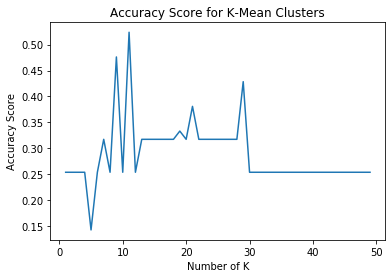

In [966]:
#cX_train, cX_test, cy_train, cy_test = train_test_split(w_data.iloc[:,:-1], w_data.iloc[:,-1], train_size=0.66, test_size=0.34, random_state=100)
test_df = w_data.copy()
#test_df.iloc[:,:-1] = test_df.iloc[:,:-1].apply(pd.to_numeric, errors='coerce') 
test_df = test_df[test_df['Life expectancy at birth (years)'].notna()]
"""plot the accuracy with k in a range from 1 to 10"""
acuracy1 = []
ks1 = range(1,50,1)
for k in ks1:
    knn_cluster = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn_cluster.fit(test_df.iloc[:,:-1], test_df.iloc[:,-1])
    y_pred=knn_cluster.predict(X_test)
    acuracy1.append(accuracy_score(y_test, y_pred))
    # print(k,accuracy_score(y_test, y_pred))
print(acuracy1[0:5])
plt.plot(ks1, acuracy1)
plt.xlabel('Number of K')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for K-Mean Clusters')
plt.show()


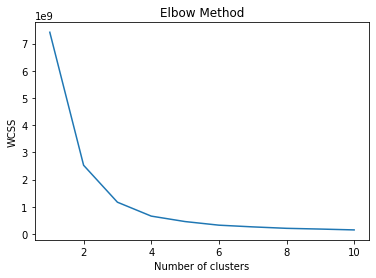

In [1170]:
# elbow method to determine numbers of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(w_data.iloc[:,:-1])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [1156]:
w_data.iloc[:,:-1]


,"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]","Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],Individuals using the Internet (% of population) [IT.NET.USER.ZS],Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS],Lifetime risk of maternal death (1 in: rate varies by country) [SH.MMR.RISK],"Maternal mortality ratio (modeled estimate, per 100,000 live births) [SH.STA.MMRT]","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%) [SH.DYN.NCOM.FE.ZS]","Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population) [SH.STA.AIRP.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population) [SH.STA.AIRP.FE.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population) [SH.STA.AIRP.MA.P5]","Mortality rate attributed to unintentional poisoning, female (per 100,000 female population) [SH.STA.POIS.P5.FE]","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5]",People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS],People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS],"People using at least basic sanitation services, urban (% of urban population) [SH.STA.BASS.UR.ZS]",Prevalence of anemia among children (% of children under 5) [SH.ANM.CHLD.ZS]
0,97.099360,1.918810,33.981,36.4,44.1,3.120401,11.200000,3.330914,30.0,673.0,27.7,211.1,195.0,229.0,1.9,13.9,64.286484,42.054183,59.921979,46.4
1,100.000000,0.156934,12.080,2.9,93.1,177.758499,66.363445,0.027187,3700.0,16.0,13.1,68.0,55.0,82.0,0.4,0.2,91.020370,97.704877,98.288014,24.9
2,99.973082,0.116624,25.250,14.8,75.7,176.265213,42.945527,0.371412,270.0,113.0,13.2,49.7,44.0,55.0,0.6,1.9,93.515851,87.542316,89.672369,30.0
5,0.000000,0.629413,41.882,63.4,27.4,42.028805,13.000000,1.501205,67.0,246.0,16.0,118.5,117.0,120.0,2.0,48.8,55.084276,48.627945,63.336756,50.9
6,100.000000,0.257299,15.717,11.9,81.8,310.397186,73.000000,0.083551,1200.0,43.0,20.0,29.9,24.0,37.0,0.4,0.1,96.739186,87.504282,91.474278,32.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,99.726219,0.257299,18.610,11.3,69.5,71.452171,60.000000,0.292389,340.0,121.0,14.5,34.6,26.0,45.0,0.2,1.4,95.778367,93.935019,91.474278,30.0
257,100.000000,0.203734,17.150,11.5,77.2,58.265572,53.000000,0.095922,1000.0,44.0,11.5,64.5,43.0,95.0,0.1,1.6,93.990123,81.855704,93.614245,33.9
261,64.359867,1.838899,31.627,28.7,56.6,172.329033,24.579208,0.700949,140.0,165.0,28.2,194.2,179.0,211.0,2.7,10.2,63.322034,58.772984,87.858275,83.5
262,9.182742,0.727592,37.292,60.6,29.2,21.650574,25.506579,1.136340,88.0,222.0,17.4,127.2,121.0,134.0,2.1,34.9,59.238564,26.086491,36.235623,54.2


In [1246]:
# feature generation using clustering labels
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(w_data.iloc[:,:-1])
feature['clusterlabel'] = kmeans.predict(w_data.iloc[:,:-1])
list(feature['clusterlabel'])


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [1159]:
from collections import defaultdict 
num_dict = {}
num_dict = defaultdict(int)
for i in feature['clusterlabel']:
    num_dict[i] +=1
num_dict      

defaultdict(int, {1: 143, 0: 34, 2: 6})

In [1247]:
# append all 211 features in the dataframe
for col in w_data.columns:
    feature[col] = w_data[col]
    
feature['Life expectancy at birth (years)'] = w_data['Life expectancy at birth (years)'] 
feature
#feature.to_csv('feature.csv')

,"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS] and Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS]","Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS] and Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS] and Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]","Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS] and Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]","Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS] and Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD]","Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS] and Individuals using the Internet (% of population) [IT.NET.USER.ZS]","Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS] and Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS]","Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS] and Lifetime risk of maternal death (1 in: rate varies by country) [SH.MMR.RISK]","Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS] and Maternal mortality ratio (modeled estimate, per 100,000 live births) [SH.STA.MMRT]","Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS] and Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%) [SH.DYN.NCOM.FE.ZS]",...,"Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population) [SH.STA.AIRP.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population) [SH.STA.AIRP.FE.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population) [SH.STA.AIRP.MA.P5]","Mortality rate attributed to unintentional poisoning, female (per 100,000 female population) [SH.STA.POIS.P5.FE]","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5]",People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS],People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS],"People using at least basic sanitation services, urban (% of urban population) [SH.STA.BASS.UR.ZS]",Prevalence of anemia among children (% of children under 5) [SH.ANM.CHLD.ZS],Life expectancy at birth (years)
0,186.315271,3299.533347,3534.416699,4282.081769,302.988977,1087.512830,323.429604,2912.980796,65347.869179,2689.652268,...,211.1,195.0,229.0,1.9,13.9,64.286484,42.054183,59.921979,46.4,Low
1,15.693402,1208.000000,290.000000,9310.000000,17775.849910,6636.344470,2.718706,370000.000000,1600.000000,1310.000000,...,68.0,55.0,82.0,0.4,0.2,91.020370,97.704877,98.288014,24.9,High
2,11.659276,2524.320309,1479.601607,7567.962272,17621.776510,4293.396660,37.131235,26992.732013,11296.958213,1319.644676,...,49.7,44.0,55.0,0.6,1.9,93.515851,87.542316,89.672369,30.0,High
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,118.5,117.0,120.0,2.0,48.8,55.084276,48.627945,63.336756,50.9,Low
6,25.729880,1571.700000,1190.000000,8180.000000,31039.718630,7300.000000,8.355056,120000.000000,4300.000000,2000.000000,...,29.9,24.0,37.0,0.4,0.1,96.739186,87.504282,91.474278,32.3,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,25.659436,1855.904927,1126.906269,6930.972187,7125.654852,5983.573111,29.158897,33906.914297,12066.872441,1446.030169,...,34.6,26.0,45.0,0.2,1.4,95.778367,93.935019,91.474278,30.0,Medium
257,20.373404,1715.000000,1150.000000,7720.000000,5826.557159,5300.000000,9.592174,100000.000000,4400.000000,1150.000000,...,64.5,43.0,95.0,0.1,1.6,93.990123,81.855704,93.61424

In [1258]:
#randomly select 66% of the instances to be training and the rest to be testing
lifeclass = feature['Life expectancy at birth (years)']
fX_train, fX_test, fy_train, fy_test = train_test_split(feature.iloc[:,:-1], lifeclass, train_size=2/3, test_size=1/3, random_state=100)

In [1219]:
list(feature.iloc[:,1])

[3299.53334706285,
 1208.0,
 2524.3203086325,
 0.0,
 1571.7,
 1733.6533921630298,
 1456.8,
 1290.0,
 1000.0,
 1630.0,
 1413.1,
 1473.8,
 1242.54221534352,
 1073.1999999999998,
 1240.0,
 1080.0,
 2058.7783670259996,
 609.09291589009,
 1757.42481797625,
 1679.54660762083,
 847.7,
 622.32766889332,
 1408.7692284807902,
 1588.2,
 910.0,
 327.4023301052,
 89.139835860222,
 1731.9796282139,
 1637.26749176728,
 751.1669078466301,
 1060.0,
 455.49167346844,
 106.488834680662,
 1303.1000000000001,
 1295.0,
 1420.00061471452,
 2335.1212421448795,
 0.0,
 753.1204520121901,
 1428.74403962928,
 1330.6000582350002,
 900.0,
 1044.88258021047,
 1085.2,
 1070.0,
 1080.0,
 535.3020599657599,
 1907.3952394407,
 1955.5104461615997,
 2767.7,
 1677.73943969926,
 206.98398050845202,
 898.4902556107801,
 1070.0,
 1732.14347601184,
 1074.7058861126402,
 2035.3177220248301,
 960.0,
 1180.0,
 1447.7198820084,
 916.1184451953,
 1392.5,
 960.0,
 2016.5296663656002,
 860.0,
 1596.95049548895,
 2196.75054621759,
 25

In [1259]:
"""calculate mutual information with each attribute and the label"""
from sklearn.metrics import accuracy_score, normalized_mutual_info_score, mutual_info_score
mi_dict = {}
for col in feature.iloc[:,:-1].columns:
    mi = normalized_mutual_info_score(fX_train[col], fy_train)
    mi_dict[col] = mi
mi_df = pd.DataFrame(list(mi_dict.values()),columns = ['NMI'], index = mi_dict.keys())
#mi_df.to_csv('mi_df.csv')
mi_df

,NMI
"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS] and Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS]",0.372161
"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS] and Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]",0.369711
"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS] and Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]",0.357779
"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS] and Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",0.371159
"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS] and Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD]",0.372161
...,...
"Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5]",0.343465
People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS],0.372161
People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS],0.364002
"People using at least basic sanitation services, urban (% of urban population) [SH.STA.BASS.UR.ZS]",0.350909


In [1260]:
# sort the MI scores from highest to lowest
mi_df.sort_values(by = 'NMI',ascending = False, inplace = True) 
mi_df[:4]

,NMI
"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",0.399703
"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS] and Mortality rate attributed to unintentional poisoning, female (per 100,000 female population) [SH.STA.POIS.P5.FE]",0.379921
"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS] and Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population) [SH.STA.AIRP.MA.P5]",0.377636
"Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population) [SH.STA.AIRP.MA.P5] and Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5]",0.375632


In [1261]:
selected_f = feature[list(mi_df[:4].index)]
feX_train, feX_test, fey_train, fey_test = train_test_split(selected_f, lifeclass, train_size=2/3, test_size=1/3, random_state=100)
scaler2 = preprocessing.StandardScaler().fit(feX_train)
feX_train=scaler2.transform(feX_train)
feX_test=scaler2.transform(feX_test)

In [1262]:
selected_f

,"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]","Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS] and Mortality rate attributed to unintentional poisoning, female (per 100,000 female population) [SH.STA.POIS.P5.FE]","Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS] and Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population) [SH.STA.AIRP.MA.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population) [SH.STA.AIRP.MA.P5] and Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5]"
0,97.099360,184.488784,22235.753406,3183.1
1,100.000000,40.000000,8200.000000,16.4
2,99.973082,59.983849,5498.519484,104.5
5,0.000000,0.000000,0.000000,5856.0
6,100.000000,40.000000,3700.000000,3.7
...,...,...,...,...
256,99.726219,19.945244,4487.679833,63.0
257,100.000000,10.000000,9500.000000,152.0
261,64.359867,173.771642,13579.931994,2152.2
262,9.182742,19.283758,1230.487426,4676.6


In [1263]:
# k-NN (k=5) classification use features sort by MI
knn_fe = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_fe.fit(feX_train, fey_train)
fey_pred=knn_fe.predict(feX_test)
print(f'Accuracy of feature engineering: {accuracy_score(fey_test, fey_pred):.3f}')

Accuracy of feature engineering: 0.770


In [1265]:
from sklearn.decomposition import PCA

pX_train, pX_test, py_train, py_test = train_test_split(feature.iloc[:,191:-1], lifeclass, train_size=2/3, test_size=1/3, random_state=100)


# normalise the data to have 0 mean and unit variance using the library functions.  This will help for later
# computation of distances between instances
scaler1 = preprocessing.StandardScaler().fit(pX_train)
pX_train=scaler1.transform(pX_train)
pX_test=scaler1.transform(pX_test)
# knn = 5

pca = PCA(n_components=4)
pX_train = pca.fit_transform(pX_train)
pX_test = pca.fit_transform(pX_test)

knn_pca = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(pX_train, py_train)
py_pred=knn_pca.predict(pX_test)
print(f'Accuracy of PCA: {accuracy_score(py_test, py_pred):.3f}')

Accuracy of PCA: 0.754


In [1264]:
feature.iloc[:,191:-1]

,"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]","Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],Individuals using the Internet (% of population) [IT.NET.USER.ZS],Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS],Lifetime risk of maternal death (1 in: rate varies by country) [SH.MMR.RISK],"Maternal mortality ratio (modeled estimate, per 100,000 live births) [SH.STA.MMRT]","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%) [SH.DYN.NCOM.FE.ZS]","Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population) [SH.STA.AIRP.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population) [SH.STA.AIRP.FE.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population) [SH.STA.AIRP.MA.P5]","Mortality rate attributed to unintentional poisoning, female (per 100,000 female population) [SH.STA.POIS.P5.FE]","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5]",People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS],People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS],"People using at least basic sanitation services, urban (% of urban population) [SH.STA.BASS.UR.ZS]",Prevalence of anemia among children (% of children under 5) [SH.ANM.CHLD.ZS]
0,97.099360,1.918810,33.981,36.4,44.1,3.120401,11.200000,3.330914,30.0,673.0,27.7,211.1,195.0,229.0,1.9,13.9,64.286484,42.054183,59.921979,46.4
1,100.000000,0.156934,12.080,2.9,93.1,177.758499,66.363445,0.027187,3700.0,16.0,13.1,68.0,55.0,82.0,0.4,0.2,91.020370,97.704877,98.288014,24.9
2,99.973082,0.116624,25.250,14.8,75.7,176.265213,42.945527,0.371412,270.0,113.0,13.2,49.7,44.0,55.0,0.6,1.9,93.515851,87.542316,89.672369,30.0
5,0.000000,0.629413,41.882,63.4,27.4,42.028805,13.000000,1.501205,67.0,246.0,16.0,118.5,117.0,120.0,2.0,48.8,55.084276,48.627945,63.336756,50.9
6,100.000000,0.257299,15.717,11.9,81.8,310.397186,73.000000,0.083551,1200.0,43.0,20.0,29.9,24.0,37.0,0.4,0.1,96.739186,87.504282,91.474278,32.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,99.726219,0.257299,18.610,11.3,69.5,71.452171,60.000000,0.292389,340.0,121.0,14.5,34.6,26.0,45.0,0.2,1.4,95.778367,93.935019,91.474278,30.0
257,100.000000,0.203734,17.150,11.5,77.2,58.265572,53.000000,0.095922,1000.0,44.0,11.5,64.5,43.0,95.0,0.1,1.6,93.990123,81.855704,93.614245,33.9
261,64.359867,1.838899,31.627,28.7,56.6,172.329033,24.579208,0.700949,140.0,165.0,28.2,194.2,179.0,211.0,2.7,10.2,63.322034,58.772984,87.858275,83.5
262,9.182742,0.727592,37.292,60.6,29.2,21.650574,25.506579,1.136340,88.0,222.0,17.4,127.2,121.0,134.0,2.1,34.9,59.238564,26.086491,36.235623,54.2


In [996]:
pd.DataFrame(fit)

,0,1,2,3
0,-3602.498580,-265.319944,473.989812,17.174254
1,75.235878,-473.800716,-184.725091,-0.167683
2,-3333.497973,-86.626419,-140.320395,67.118946
3,-3553.880222,-208.075136,34.325823,1.604207
4,-2393.029809,-55.326614,-201.426588,69.032364
...,...,...,...,...
178,-3275.651046,-197.639541,-148.689025,96.995568
179,-2621.000885,-285.585579,-191.725927,12.624258
180,-3466.539002,-88.961733,5.884830,-151.636011
181,-3535.175646,-230.459501,18.625361,-23.471075


In [1254]:
# k-NN (k=5) classification use the first four features 
ffX_train, ffX_test, ffy_train, ffy_test = train_test_split(feature.iloc[:,191:195], lifeclass, train_size=2/3, test_size=1/3, random_state=100)
scaler3 = preprocessing.StandardScaler().fit(ffX_train)
ffX_train=scaler3.transform(ffX_train)
ffX_test=scaler3.transform(ffX_test)
knn_ff = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_ff.fit(ffX_train, ffy_train)
ffy_pred=knn_ff.predict(ffX_test)
print(f'Accuracy of first four features: {accuracy_score(ffy_test, ffy_pred):.3f}')

Accuracy of first four features: 0.754


In [1124]:
feature.iloc[:,191:195]

,"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]"
0,97.099360,1.918810,33.981,36.4
1,100.000000,0.156934,12.080,2.9
2,99.973082,0.116624,25.250,14.8
5,0.000000,0.629413,41.882,63.4
6,100.000000,0.257299,15.717,11.9
...,...,...,...,...
256,99.726219,0.257299,18.610,11.3
257,100.000000,0.203734,17.150,11.5
261,64.359867,1.838899,31.627,28.7
262,9.182742,0.727592,37.292,60.6


In [1127]:
list(classlabel)

['Low',
 'High',
 'High',
 'Low',
 'Medium',
 'High',
 'Medium',
 'High',
 'High',
 'Medium',
 'High',
 'High',
 'Medium',
 'High',
 'Medium',
 'High',
 'Medium',
 'Low',
 'Medium',
 'Medium',
 'High',
 'Low',
 'High',
 'High',
 'Medium',
 'Low',
 'Low',
 'Medium',
 'Medium',
 'Low',
 'High',
 'Low',
 'Low',
 'High',
 'High',
 'High',
 'Low',
 'Low',
 'Low',
 'High',
 'Low',
 'High',
 'High',
 'High',
 'High',
 'High',
 'Low',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'Low',
 'Low',
 'High',
 'Low',
 'Low',
 'Medium',
 'High',
 'High',
 'Low',
 'Low',
 'Medium',
 'High',
 'Low',
 'High',
 'Medium',
 'Medium',
 'Low',
 'Low',
 'Low',
 'Low',
 'High',
 'High',
 'High',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'High',
 'High',
 'High',
 'High',
 'High',
 'Medium',
 'Medium',
 'Low',
 'Low',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'Low',
 'Medium',
 'High',
 'Low',
 'Low',
 'Medium',
 'Medium',
 'High',
 'Low',
 'Low',
 'High',
 'High',
 'Low',
 'High',
 'Low',
 'Medium',
 'High',
 '